 # C2_W2_SoftMax
In this lab, we will explore the softmax function. This function is used in both Softmax Regression and in Neural Networks when solving Multiclass Classification problems.  

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=1}^{N}{e^{z_k} }} \tag{1}$$




In [3]:
def my_softmax(z):
    ez= np.exp(z)
    sm = np.sum(ez)
    softmax= ez/sm
    return softmax

# Cost function 
Side note : loss function refer to single observation and cost function refer to all the observations.
The loss function associated with Softmax, the cross-entropy loss, is:
\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
\end{equation}

Now the cost is:
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] \tag{4}
\end{align}

Where $m$ is the number of examples, $N$ is the number of outputs. This is the average of all the losses.


In [5]:
# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

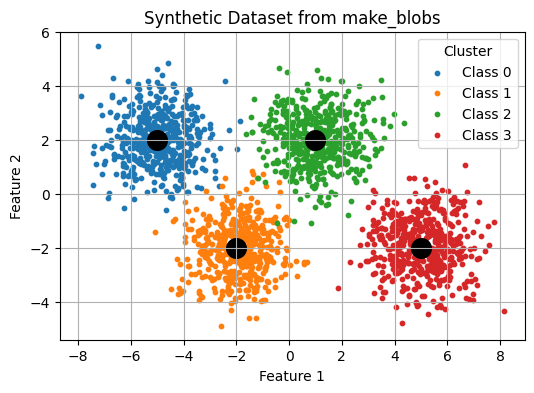

In [33]:

plt.figure(figsize=(6, 4))
for label in np.unique(y_train):
    
    plt.scatter(
        X_train[y_train == label, 0], 
        X_train[y_train == label, 1], 
        label=f"Class {label}", 
        s=10
    
    )
    plt.scatter(centers[label][0],centers[label][1],color='k',s=200)
plt.title("Synthetic Dataset from make_blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster", loc="upper right")
plt.grid(True)
plt.show()


In [34]:
model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10
)

2025-06-14 20:26:11.962564: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.3961
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5046
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1958
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1024
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0777
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0609
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0510
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0580
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0456
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0479


In [36]:
# it is not prefered since softmax is intigrated in the output layer ,less accurate computation via tensorflow
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[2.27876729e-03 2.79677473e-03 9.75699782e-01 1.92247182e-02]
 [9.93031085e-01 6.76571811e-03 8.21118956e-05 1.21084835e-04]]
largest value 0.9999988 smallest value 1.5983161e-08


In [37]:
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)
     

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0481
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4265
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1841
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1166
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0789
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0667
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0539
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0563
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0562
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0483


#### Output Handling
Notice that in the preferred model, the outputs are not probabilities, but can range from large negative numbers to large positive numbers. The output must be sent through a softmax when performing a prediction that expects a probability. 
Let's look at the preferred model outputs:

In [38]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
two example output vectors:
 [[-1.4735657  -2.2293026   3.9633315   0.37717766]
 [ 2.5782428  -2.834805   -6.506224   -8.596017  ]]
largest value 12.191111 smallest value -13.749942


In [39]:
# to convert into probability
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[4.2094183e-03 1.9770141e-03 9.6702254e-01 2.6791055e-02]
 [9.9543554e-01 4.4376836e-03 1.1289618e-04 1.3966707e-05]]
largest value 0.9999987 smallest value 3.8714927e-11


In [44]:
for i in range(5):
    formatted= [f"{x:.2f}" for x in sm_preferred[i]]
    print( f"{formatted}, category: {np.argmax(sm_preferred[i])}")

['0.00', '0.00', '0.97', '0.03'], category: 2
['1.00', '0.00', '0.00', '0.00'], category: 0
['0.97', '0.03', '0.00', '0.00'], category: 0
['0.01', '0.98', '0.00', '0.01'], category: 1
['0.00', '0.00', '1.00', '0.00'], category: 2
